In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [53]:
# check the # of observations and columns - (12330, 18)
df.shape
# check missing values
for column in df:
    bool_series = pd.isnull(df[column])
    print(df[bool_series])

Empty DataFrame
Columns: [Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue]
Index: []
Empty DataFrame
Columns: [Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue]
Index: []
Empty DataFrame
Columns: [Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue]
Index: []
Empty DataFrame
Columns: [Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, Produ

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [226]:
# False, True = 10422, 1908
df.groupby('Revenue').count()

pv = df.groupby('Revenue')[['Administrative', 'Informational', 'ProductRelated']].mean().reset_index()

pv

,Revenue,Administrative,Informational,ProductRelated
0,False,2.117732,0.451833,28.714642
1,True,3.393606,0.786164,48.210168


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

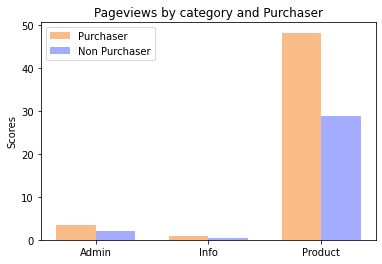

In [232]:
labels = ['Admin', 'Info', 'Product']

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pv.loc[1][1:], width, color='#f9bc86',label='Purchaser', )
rects2 = ax.bar(x + width/2, pv.loc[0][1:], width, color='#a3acff',label='Non Purchaser')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Pageviews by category and Purchaser')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [217]:
df.groupby('Revenue')[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean().reset_index()

,Revenue,Administrative_Duration,Informational_Duration,ProductRelated_Duration
0,False,73.740111,30.236237,1069.987809
1,True,119.483244,57.611427,1876.209615


In [34]:
# BounceRates refers to the percentage of visitors who enter the site from that page and then leave ("bounce") 
#   without triggering any other requests to the analytics server during that session.
# ExitRates refers to for all pageviews to the page, the percentage that were the last in the session.
# PageValues represents the average value for a web page that a user visited before completing a transaction.
# SpecialDay indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day) 
#   in which the sessions are more likely to be finalized with transaction. 

df.groupby('Revenue')[['BounceRates', 'ExitRates','PageValues','SpecialDay']].mean()

,BounceRates,ExitRates,PageValues,SpecialDay
Revenue,,,,
False,0.025317,0.047378,1.975998,0.068432
True,0.005117,0.019555,27.264518,0.023166


In [35]:
# Features I don't think really matter, but nice to check.

df.groupby('Revenue')[['OperatingSystems', 'Browser','Region','TrafficType']].mean()

,OperatingSystems,Browser,Region,TrafficType
Revenue,,,,
False,2.129726,2.339474,3.159278,4.078392
True,2.092767,2.453354,3.082285,4.021488


In [162]:
# Month

Pur_Mon = df.groupby('Month')['Revenue'].value_counts().unstack().reset_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Pur_Mon['Month'] = pd.Categorical(Pur_Mon['Month'], categories=months, ordered=True)
Pur_Mon.sort_values(by='Month',inplace=True)
Pur_Mon

Revenue,Month,False,True
2,Feb,181,3
5,Mar,1715,192
6,May,2999,365
4,June,259,29
3,Jul,366,66
0,Aug,357,76
9,Sep,362,86
8,Oct,434,115
7,Nov,2238,760
1,Dec,1511,216


Text(0, 0.5, '# of vistors')

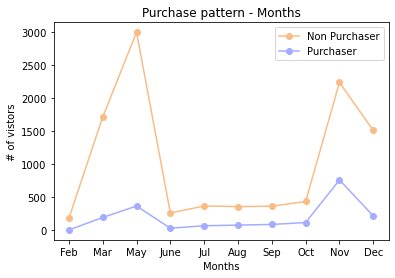

In [172]:
# Line chart

fig, ax = plt.subplots()
ax.plot(Pur_Mon['Month'],Pur_Mon[0], color='#f9bc86', marker='o', label="Non Purchaser")
ax.plot(Pur_Mon['Month'],Pur_Mon[1], color='#a3acff', marker='o',label="Purchaser")
ax.legend()
ax.set_title('Purchase pattern - Months')
ax.set_xlabel('Months')
ax.set_ylabel('# of vistors')

In [171]:
# weekend

WE_pct = df.groupby('Weekend')['Revenue'].value_counts().unstack(fill_value=0).reset_index()
WE_pct['Pct_F'] = WE_pct[False]/(WE_pct[False] + WE_pct[True])
WE_pct['Pct_T'] = 1 - WE_pct['Pct_F']
print(WE_pct)

Revenue  Weekend  False  True     Pct_F     Pct_T
0          False   8053  1409  0.851089  0.148911
1           True   2369   499  0.826011  0.173989


In [ ]:
blueBars = WE_pct['Pct_T']
orangeBars = WE_pct['Pct_F']

barWidth = 0.5
names = ('Week day', 'Weekend')
# Create green Bars
plt.bar(WE_pct['Weekend'],blueBars, color='#a3acff', edgecolor='white', width=barWidth, label="Purchaser")
# Create orange Bars
plt.bar(WE_pct['Weekend'], orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label="None Purchaser")


# Plot format
plt.title('Purchase pattern - Week day vs. Weekend')
plt.legend()
plt.xlabel("Week day vs. Weekend")
plt.ylabel("Pct.")
plt.xticks(WE_pct['Weekend'], names)

str_1 = str(round(WE_pct['Pct_T'][0] * 100, 2)) + '%'
str_2 = str(round(WE_pct['Pct_T'][1] * 100, 2)) + '%'
plt.text(-0.06, 0.2, str_1, fontsize=10)
plt.text(0.95, 0.2, str_2, fontsize=10)

In [40]:
# 12.2%
# 0.7%
# 87.1% -- Returning_Visitor
# 22.1%
# 0.8%
# 77.0% -- Returning_Visitor
df.groupby(['Revenue','VisitorType'])['Revenue'].count()

Revenue  VisitorType      
False    New_Visitor          1272
         Other                  69
         Returning_Visitor    9081
True     New_Visitor           422
         Other                  16
         Returning_Visitor    1470
Name: Revenue, dtype: int64

In [208]:
# pageview buckets
df['ProductBuck'] = pd.cut(df.ProductRelated, [-np.inf, 20, 40, 60, 80, 100, np.inf],
                              labels=['<=20', '<=40', '<=60', '<=80',
                                      '<=100', '>100'])

# other pages buckets
df['AdminBuck'] = pd.cut(df.Administrative, [-np.inf, 5, 10, 15, 20, 25, np.inf],
                              labels=['<=5', '<=10', '<=15', '<=20',
                                      '<=25', '>25'])

df['InfoBuck'] = pd.cut(df.Informational, [-np.inf, 5, 10, 15, 20, np.inf],
                              labels=['<=5', '<=10', '<=15', '<=20', '>20'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,ProductBuck,AdminBuck,InfoBuck
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,<=20,<=5,<=5
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,<=20,<=5,<=5
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,<=20,<=5,<=5
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,<=20,<=5,<=5
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,<=20,<=5,<=5


In [99]:
# Product pageviews
Prod_pct = df.groupby('ProductBuck')['Revenue'].value_counts().unstack(fill_value=0).reset_index()
Prod_pct['Pct_F'] = Prod_pct[False]/(Prod_pct[False] + Prod_pct[True])
Prod_pct['Pct_T'] = 1 - Prod_pct['Pct_F']
print(Prod_pct)

Revenue ProductBuck  False  True     Pct_F     Pct_T
0              <=20   6054   679  0.899153  0.100847
1              <=40   2215   545  0.802536  0.197464
2              <=60    916   244  0.789655  0.210345
3              <=80    466   123  0.791171  0.208829
4             <=100    277    88  0.758904  0.241096
5              >100    494   229  0.683264  0.316736


Text(0, 0.5, 'Pct.')

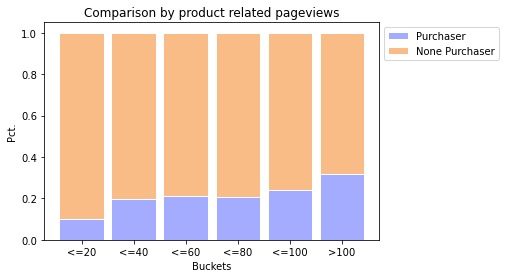

In [169]:
# percentage stacked bar chart

blueBars = Prod_pct['Pct_T']
orangeBars = Prod_pct['Pct_F']

barWidth = 0.85
names = Prod_pct['ProductBuck']
# Create green Bars
plt.bar(Prod_pct['ProductBuck'],blueBars, color='#a3acff', edgecolor='white', width=barWidth, label="Purchaser")
# Create orange Bars
plt.bar(Prod_pct['ProductBuck'], orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label="None Purchaser")


# Plot format
plt.title('Comparison by product related pageviews')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xlabel("Buckets")
plt.ylabel("Pct.")

In [201]:
# Admin pageviews
Adm_pct = df.groupby('AdminBuck')['Revenue'].value_counts().unstack(fill_value=0).reset_index()
Adm_pct['Pct_F'] = Adm_pct[False]/(Adm_pct[False] + Adm_pct[True])
Adm_pct['Pct_T'] = 1 - Adm_pct['Pct_F']
print(Adm_pct)

Revenue AdminBuck  False  True     Pct_F     Pct_T
0             <=5   9036  1455  0.861310  0.138690
1            <=10   1092   343  0.760976  0.239024
2            <=15    238    91  0.723404  0.276596
3            <=20     44    16  0.733333  0.266667
4            <=25     11     2  0.846154  0.153846
5             >25      1     1  0.500000  0.500000


Text(0, 0.5, 'Pct.')

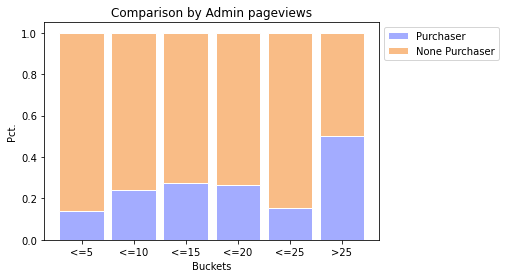

In [212]:
# percentage stacked bar chart

blueBars = Adm_pct['Pct_T']
orangeBars = Adm_pct['Pct_F']

barWidth = 0.85
names = Adm_pct['AdminBuck']
# Create green Bars
plt.bar(Adm_pct['AdminBuck'],blueBars, color='#a3acff', edgecolor='white', width=barWidth, label="Purchaser")
# Create orange Bars
plt.bar(Adm_pct['AdminBuck'], orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label="None Purchaser")


# Plot format
plt.title('Comparison by Admin pageviews')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xlabel("Buckets")
plt.ylabel("Pct.")

In [210]:
# Info pageviews
Info_pct = df.groupby('InfoBuck')['Revenue'].value_counts().unstack(fill_value=0).reset_index()
Info_pct['Pct_F'] = Info_pct[False]/(Info_pct[False] + Info_pct[True])
Info_pct['Pct_T'] = 1 - Info_pct['Pct_F']
print(Info_pct)

Revenue InfoBuck  False  True     Pct_F     Pct_T
0            <=5  10298  1871  0.846249  0.153751
1           <=10    115    35  0.766667  0.233333
2           <=15      7     2  0.777778  0.222222
3           <=20      1     0  1.000000  0.000000
4            >20      1     0  1.000000  0.000000


Text(0, 0.5, 'Pct.')

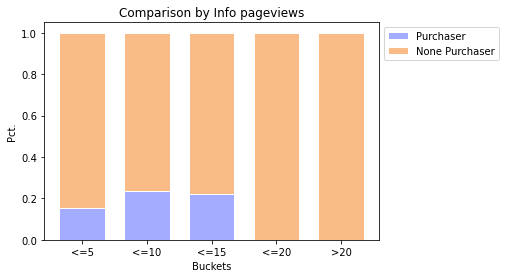

In [215]:
# percentage stacked bar chart

blueBars = Info_pct['Pct_T']
orangeBars = Info_pct['Pct_F']

barWidth = 0.7
names = Info_pct['InfoBuck']
# Create green Bars
plt.bar(Info_pct['InfoBuck'],blueBars, color='#a3acff', edgecolor='white', width=barWidth, label="Purchaser")
# Create orange Bars
plt.bar(Info_pct['InfoBuck'], orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label="None Purchaser")


# Plot format
plt.title('Comparison by Info pageviews')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xlabel("Buckets")
plt.ylabel("Pct.")